In [8]:
import warnings 
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

# Предобработка текста (удаление стоп-слов и стемминг)
def preprocess_text(text):
    stop_words = set(stopwords.words("russian"))
    ps = PorterStemmer()

    words = word_tokenize(text.lower(), language='russian')
    filtered_words = [ps.stem(word) for word in words if word.isalnum() and word not in stop_words]

    return " ".join(filtered_words)

# Склеивание ответов на каждый вопрос в одну строку
responses = []
for i, row in df.iterrows():
    combined_response = ' '.join([preprocess_text(str(row[col])) for col in df.columns[3:]])  
    responses.append(combined_response)

# Создание векторного представления с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(responses)

# Рассчет косинусного сходства
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)


# for i in range(len(responses)):
#     for j in range(len(responses)):
#         print(f"Косинусное сходство между ответами {i+1} и {j+1}: {cosine_similarities[i][j]:.2f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naclz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naclz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1500x800 with 0 Axes>

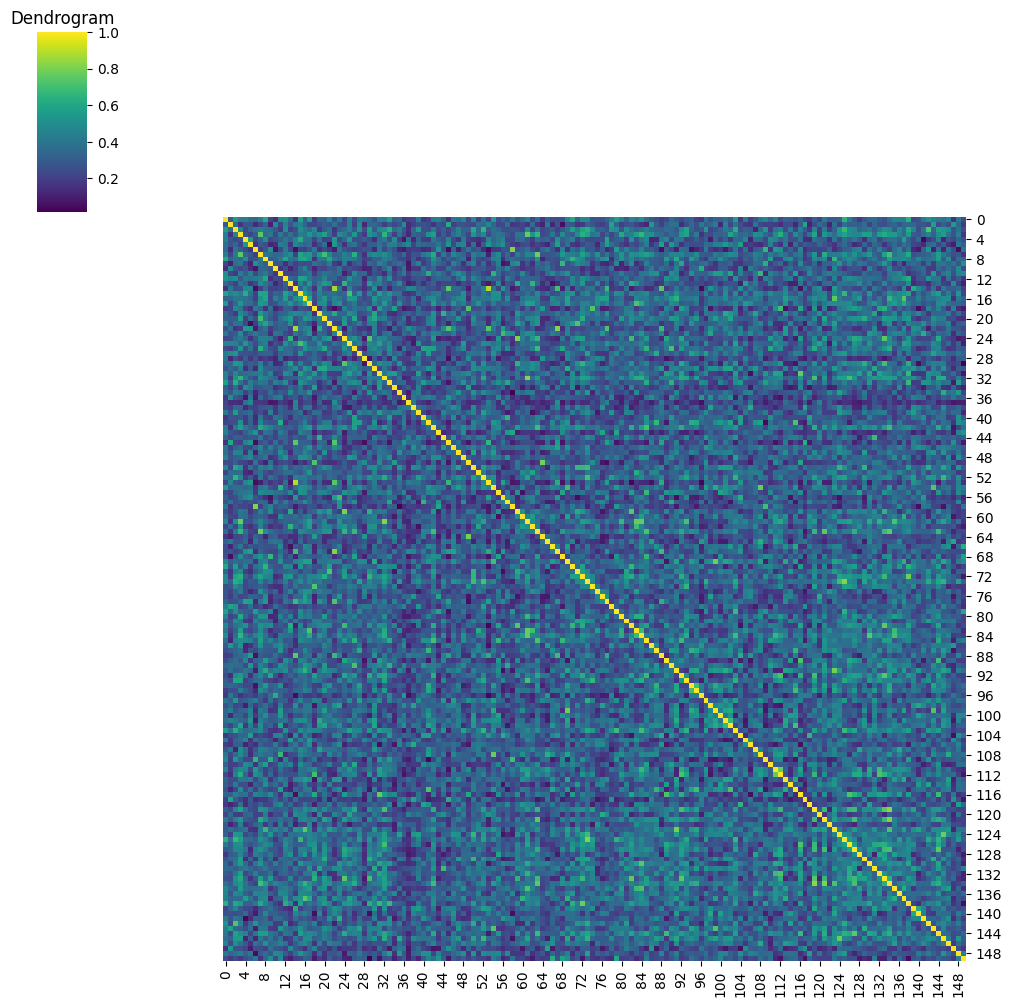

             ID  Cluster
0    1535754580        0
1    1535754032        0
2    1535753624        0
3    1535751700        0
4    1535751685        0
..          ...      ...
145  1534230056        0
146  1531950248        0
147  1531524267        0
148  1531420154        0
149  1531416707        2

[150 rows x 2 columns]
Cluster results saved to cluster_results.csv


In [10]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt


n_clusters = 4
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')
clusters = cluster_model.fit_predict(cosine_similarities)

plt.figure(figsize=(15, 8))
sns.clustermap(cosine_similarities, method='average', cmap='viridis', col_cluster=False, row_cluster=False)
plt.title('Dendrogram')
plt.show()

df['Cluster'] = clusters
print(df[['ID', 'Cluster']])

cluster_results_file = "cluster_results.csv"
df.to_csv(cluster_results_file, index=False)
print(f"Cluster results saved to {cluster_results_file}")

In [11]:
output_file = "cluster_output1.csv"

with open(output_file, 'w', encoding='utf-8') as f:
    for cluster_id in range(n_clusters):
        cluster_df = df[df['Cluster'] == cluster_id]
        f.write(f'\nCluster {cluster_id}:\n')
        f.write(f'{cluster_df.to_markdown(index=False)}\n')

print(f"Cluster results saved to {output_file}")

output_file = "cluster_output.csv"

for cluster_id in range(n_clusters):
    cluster_df = df[df['Cluster'] == cluster_id]
    cluster_df.to_csv(output_file, mode='a', header=cluster_id == 0, index=False, encoding='utf-8')

print(f"Cluster results saved to {output_file}")


Cluster results saved to cluster_output1.csv
Cluster results saved to cluster_output.csv


1. Анализ кластеров:

	1. Визуальный анализ: Посмотрите на характеристики каждого кластера с использованием визуализации. Это может включать в себя облака слов, гистограммы распределения ответов, анализ длины ответов и т. д.

	2. Статистический анализ: Используйте статистические методы для анализа различий между кластерами. Например, t-тесты, анализ дисперсии и другие методы могут помочь определить, насколько кластеры различаются между собой.
	

2. Дайте названия кластерам: 

	1. На основе содержания: Посмотрите на доминирующие темы в каждом кластере и дайте им название, отражающее общую характеристику. Например, "Технологически ориентированные", "Исследовательски настроенные", "Общественно активные" и т. д.

	2. На основе статистики: Если вы обнаруживаете статистически значимые различия, вы можете использовать эти различия для классификации кластеров. Например, "Кластер с высокими оценками", "Кластер с низкими оценками" и т. д.

3. Применение результирующих меток:

	1. Дальнейший анализ: Примените полученные метки кластеров в дальнейших анализах данных. Это может включать в себя создание новых признаков, дополнительный анализ, или использование кластеров в качестве целевых переменных для обучения моделей.

	2. Принятие решений: Если у вас есть конкретные бизнес-задачи, используйте информацию из кластеров для принятия решений. Например, если вы классифицировали клиентов, это может помочь в настройке персонализированных стратегий обслуживания.
	

4. Мониторинг и итерации:

	1. Мониторинг: Следите за эффективностью вашей классификации и, при необходимости, внесите коррективы.

	2. Итерации: В зависимости от результатов дальнейшего анализа, вы можете провести дополнительные итерации, чтобы уточнить классификацию или расширить ее функциональность.

СТАТИСТИЧЕСКИЕ МЕТОДЫ


1. Проведение статистических тестов:

	Можете использовать t-тесты, анализ дисперсии (ANOVA) или другие статистические тесты для определения значимых различий между кластерами. Эти тесты могут дать вам статистически значимые результаты.

2. Выбор переменных для анализа:

	Определите, какие переменные из ваших данных вы хотите проанализировать. Это могут быть ответы на конкретные вопросы опроса или другие характеристики, которые вы считаете важными.

3. Подготовка данных:

	Убедитесь, что ваши данные готовы к анализу. Возможно, вам нужно будет обработать данные, чтобы они соответствовали требованиям выбранных статистических методов.
	
4. Выбор уровня значимости:

	Определите уровень значимости (например, 0.05), который вы готовы принять для определения статистической значимости.

5. Интерпретация результатов:

	После проведения тестов интерпретируйте результаты. Определите, есть ли статистически значимые различия между кластерами, и какие переменные вносят вклад в эти различия.

             ID  Cluster
0    1535754580        0
1    1535754032        0
2    1535753624        0
3    1535751700        0
4    1535751685        0
..          ...      ...
145  1534230056        0
146  1531950248        0
147  1531524267        0
148  1531420154        0
149  1531416707        2

[150 rows x 2 columns]


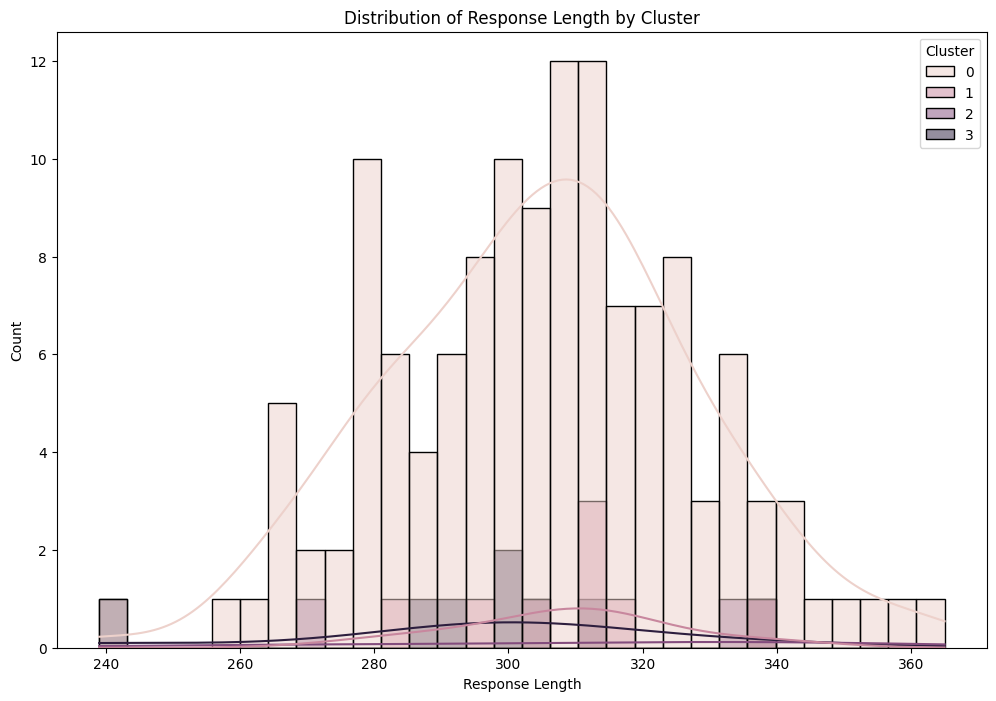

In [15]:
df['Cluster'] = clusters
print(df[['ID', 'Cluster']])

df['CombinedResponse'] = responses
df['ResponseLength'] = df['CombinedResponse'].apply(len)

# Посмотрим на распределение длины ответов в каждом кластере
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='ResponseLength', hue='Cluster', kde=True, bins=30)
plt.title('Distribution of Response Length by Cluster')
plt.xlabel('Response Length')
plt.ylabel('Count')
plt.show()

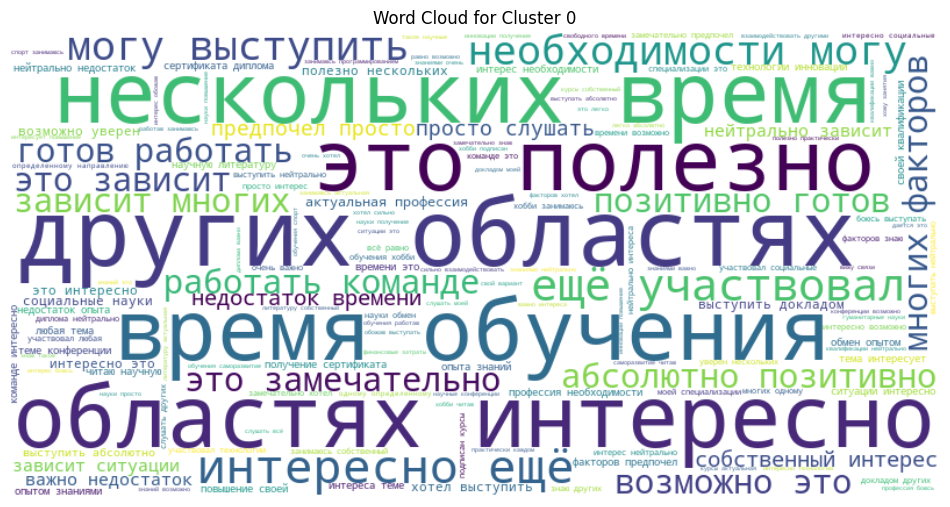

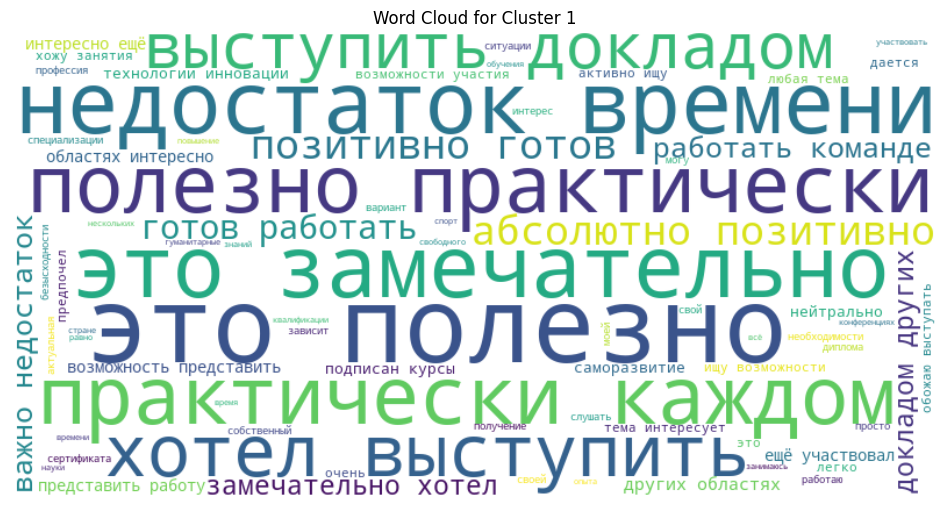

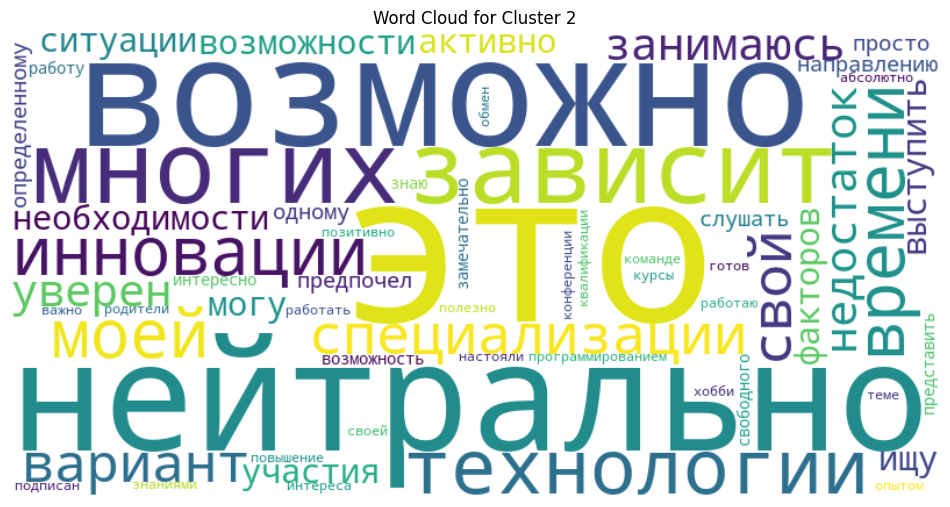

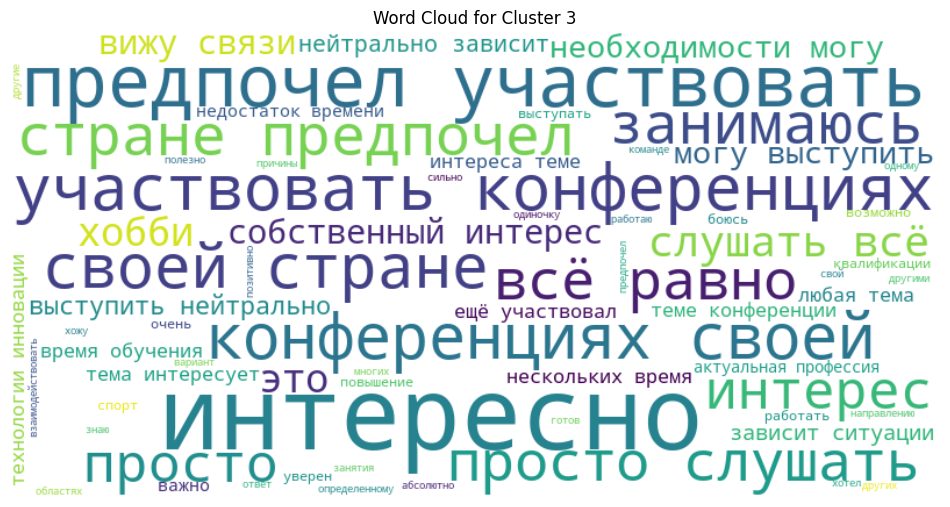

In [16]:
from wordcloud import WordCloud

for cluster_id in range(n_clusters):
    cluster_responses = df[df['Cluster'] == cluster_id]['CombinedResponse'].values
    text = ' '.join(cluster_responses)
    
    wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster_id}')
    plt.show()
#облако слов для визуального представления наиболее часто встречающихся слов в каждом кластере

Cluster 0 has 122 unique words.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naclz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


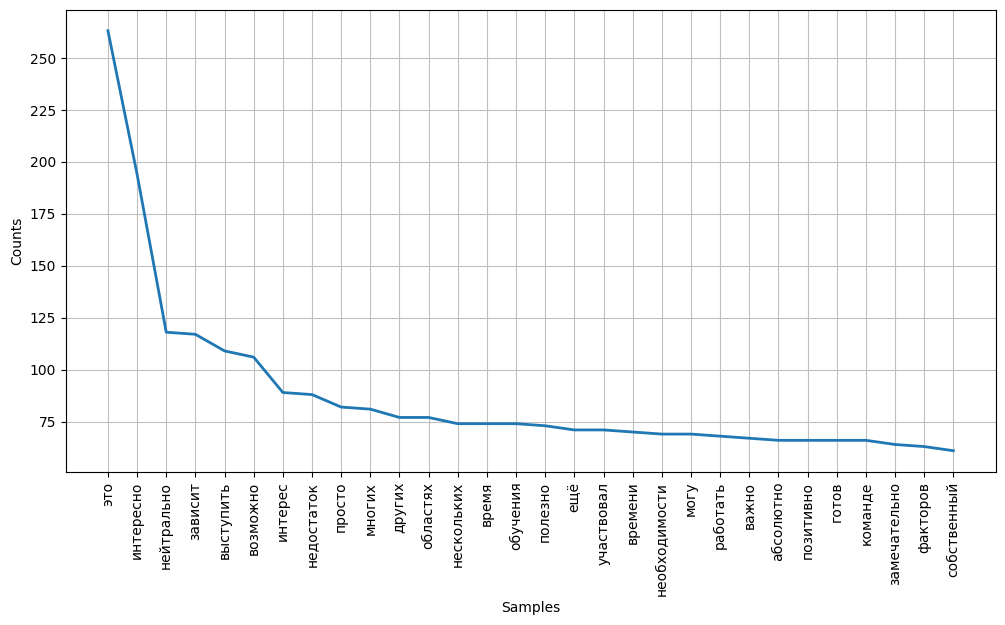

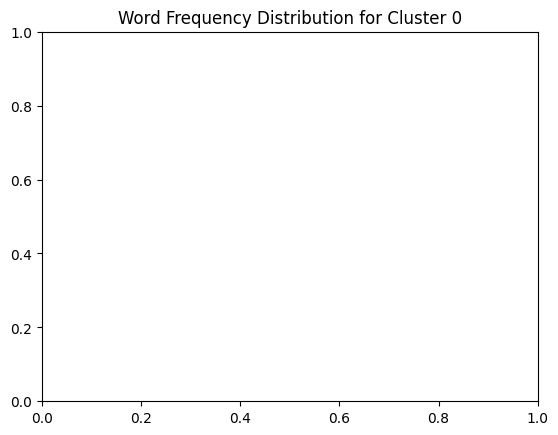

Cluster 1 has 82 unique words.


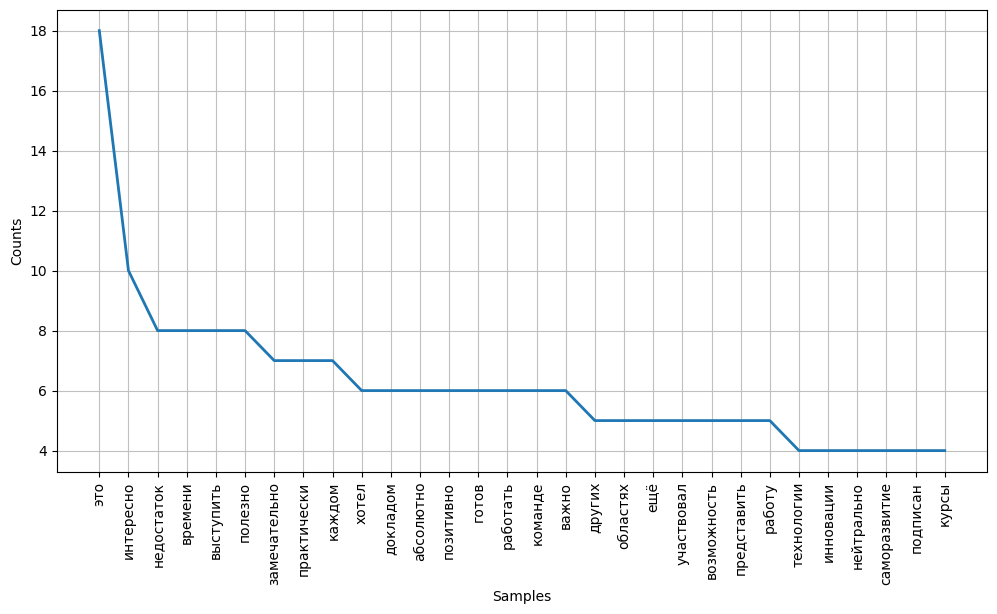

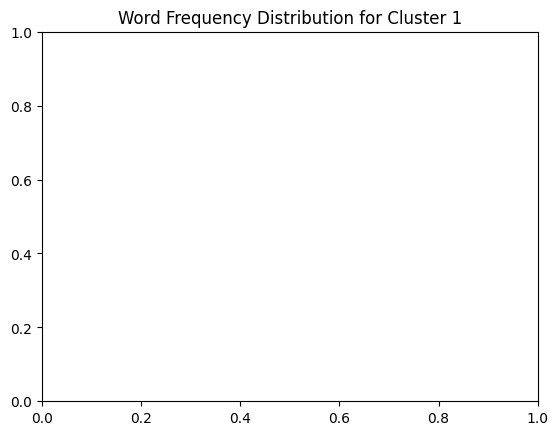

Cluster 2 has 60 unique words.


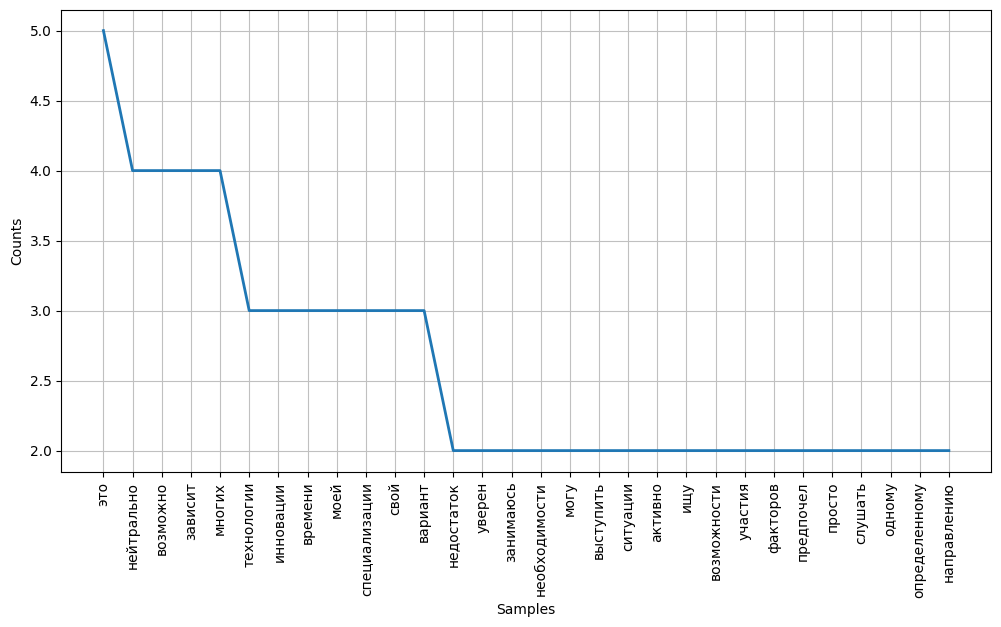

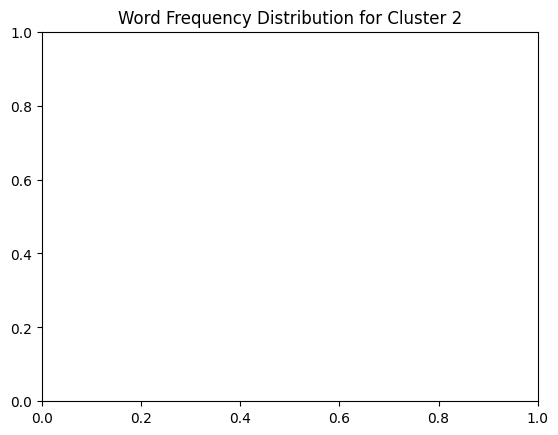

Cluster 3 has 75 unique words.


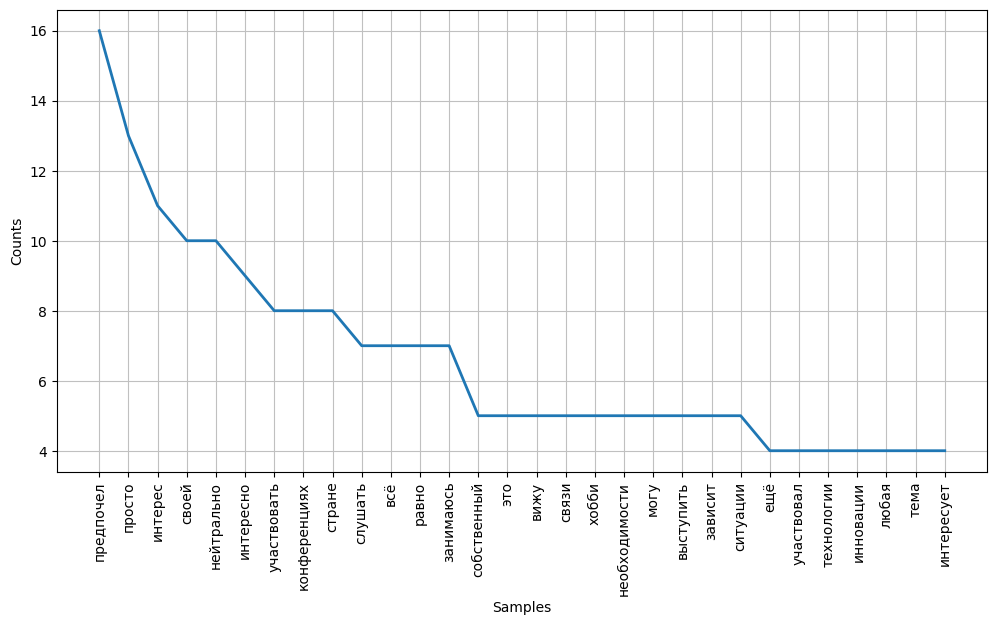

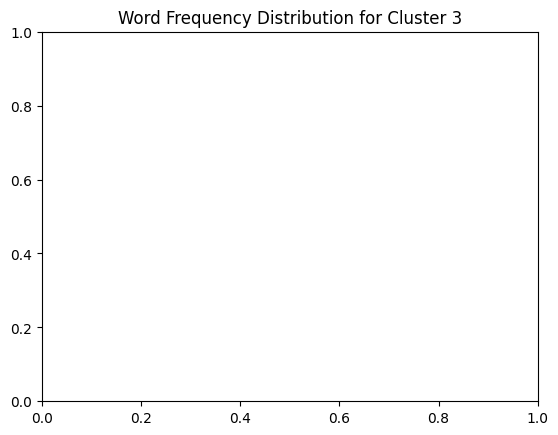

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

text_column = 'CombinedResponse'

for cluster_id in range(n_clusters):
	
    cluster_responses = df[df['Cluster'] == cluster_id][text_column].values
    text = ' '.join(cluster_responses)

    # Токенизация и распределение частоты слов
    tokens = word_tokenize(text.lower())
    freq_dist = FreqDist(tokens)

    unique_words_count = len(freq_dist)
    print(f'Cluster {cluster_id} has {unique_words_count} unique words.')

    if len(freq_dist) > 0:
        plt.figure(figsize=(12, 6))
        freq_dist.plot(30, cumulative=False)
        plt.title(f'Word Frequency Distribution for Cluster {cluster_id}')
        plt.show()
    else:
        print(f'Cluster {cluster_id} has no text data.')


In [41]:
import spacy

nlp = spacy.load("ru_core_news_sm")

# Функция классификации ответа
def classify_response(response):
    doc = nlp(response.lower())
    
    # Пример условий, вы можете настроить их под свои критерии
    if any(term in response for term in ["Мне это не интересно"]):
        return "Студент не заинтересован в участии в научных конференциях"
    elif any(term in response for term in ["Мне интересно, но я ещё не участвовал"]):
        return "Студенту интересно принять участие в науч конф, но еще не участвовал"
    elif any(term in response for term in ["Я активно ищу возможности для участия"]):
        return "Студент готов к участию в науч конф"
    elif any(term in response for term in ["Я не знаю, что такое научные конференции."]):
        return "Студент не дал четкого ответа в заинтересованности в участие в науч конф из-за незнания что из себя представляет науч конф"    
    else:
        return "Не классифицировано"

# Apply the classification function
df['ClassifiedCategory'] = df['CombinedResponse'].apply(classify_response)

# Print the DataFrame to check the results
print(df[['CombinedResponse', 'ClassifiedCategory']])


NameError: name 'response' is not defined

In [42]:
# Заменить текстовые значения числовыми кодами
df['NumericalResponse'] = df['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'].astype('category').cat.codes

# Создать список данных для каждого кластера
clusters_data = [df[df['Cluster'] == i]['NumericalResponse'] for i in range(n_clusters)]

# Провести однофакторный дисперсионный анализ (ANOVA)
f_stat, p_value = f_oneway(*clusters_data)

# Интерпретировать результаты
if p_value < 0.05:
    print("Есть статистически значимые различия между кластерами.")
else:
    print("Нет статистически значимых различий между кластерами.")


Нет статистически значимых различий между кластерами.
